# MSDS 631 - Lecture 8 (March 20, 2019)

## Combining Data in Pandas

### Merging Data

Merging data is one of the most powerful tools in Pandas. If you've learned SQL before, then you'll be familiar with a lot of these concepts. Merging allows us to match data from different DataFrames.

Using the students data, imagine we are trying to "standardize" the students GPAs. For those of you unfamiliar with standardization, it is measuring the number of standard deviations away from the mean that a value is.

Since each major has a slightly different level of difficulty and each class has a different composition of student talent, we want to compare each student's GPA against the values for their major and class. Let's do that now.

In [46]:
import pandas as pd
students_df = pd.read_csv('students.csv')

In [47]:
students_df.head()

,student_id,first,last,gender,class,major,gpa
0,5a397209-3782-4764-a285-10fae807ee71,Janis,Brown,Female,Junior,Economics,3.12
1,e26c3d69-3c74-49b6-81d7-47232787fad9,Timothy,Bishop,Male,Sophomore,Economics,3.48
2,975c1581-5ba2-430c-a3d1-01ce03bd83f9,Elizabeth,Owens,Female,Freshman,Finance,3.40
3,6081f91d-365c-46ce-ad1b-38af120781d9,Edward,Pearson,Male,Freshman,Math,3.84
4,84cec8f4-0b64-44ce-a628-c0eb73f6ca6f,Lisa,Gonzalez,Female,Junior,Finance,4.00


In [48]:
mean_gpa_by_major_and_class = students_df.groupby(['major', 'class'])[['gpa']].mean()
std_gpa_by_major_and_class = students_df.groupby(['major', 'class'])[['gpa']].std()                                                                     

In [49]:
mean_gpa_by_major_and_class.loc[('Economics', 'Junior')]['gpa'] #What does this do again? #where are we explicitly shown std

3.4765645514223205

In [50]:
major_and_class = mean_gpa_by_major_and_class = mean_gpa_by_major_and_class.rename(columns={'gpa':'mean_gpa'})

In [51]:
mean_gpa_by_major_and_class.head()

mean_gpa
major     class              
Chemistry Freshman   3.353288
          Junior     3.379573
          Senior     3.364355
          Sophomore  3.341518
Economics Freshman   3.492404

In [52]:
std_gpa_by_major_and_class.head()

gpa
major     class              
Chemistry Freshman   0.326013
          Junior     0.313071
          Senior     0.317976
          Sophomore  0.341938
Economics Freshman   0.329126

In [53]:
#Need to rename column since they share the same name - method 1
mean_gpa_by_major_and_class.colums = ['mean_gpa']
std_gpa_by_major_and_class.columns = ['std_gpa']

/Users/ayoellis/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  


In [54]:
#Method 2 for renaming columns
#Note this method RETURNS the new dataframe
mean_gpa_by_major_and_class = mean_gpa_by_major_and_class.rename(columns={'gpa':'mean_gpa'})
std_gpa_by_major_and_class = std_gpa_by_major_and_class.rename(columns={'gpa':'std_gpa'})

In [55]:
#Merge means to students_df, by major and class what is themean and ST of every student, another column that says mean pga and avg 
students_df = students_df.merge(mean_gpa_by_major_and_class, how='left',left_on=['major','class'], right_index=True)
students_df.head()
#x = students_df.sort_values(['major','class'])

,student_id,first,last,gender,class,major,gpa,mean_gpa
0,5a397209-3782-4764-a285-10fae807ee71,Janis,Brown,Female,Junior,Economics,3.12,3.476565
1,e26c3d69-3c74-49b6-81d7-47232787fad9,Timothy,Bishop,Male,Sophomore,Economics,3.48,3.476573
2,975c1581-5ba2-430c-a3d1-01ce03bd83f9,Elizabeth,Owens,Female,Freshman,Finance,3.40,3.620223
3,6081f91d-365c-46ce-ad1b-38af120781d9,Edward,Pearson,Male,Freshman,Math,3.84,3.281886
4,84cec8f4-0b64-44ce-a628-c0eb73f6ca6f,Lisa,Gonzalez,Female,Junior,Finance,4.00,3.597969


In [62]:
students_df_w_mean_std = students_df_w_mean_std.merge(std_gpa_by_major_and_class, how='left',left_on=['major','class'], right_index=True)





In [66]:
#What does the DataFrame look like now?
students_df_w_mean.head()

NameError: name 'students_df_w_mean' is not defined

In [ ]:
#Merge standard deviations to new students_df

In [65]:
#What does the DataFrame look like now?
students_df_w_mean_std.head()

,student_id,first,last,gender,class,major,gpa,mean_gpa,std_gpa
0,5a397209-3782-4764-a285-10fae807ee71,Janis,Brown,Female,Junior,Economics,3.12,3.476565,0.326551
1,e26c3d69-3c74-49b6-81d7-47232787fad9,Timothy,Bishop,Male,Sophomore,Economics,3.48,3.476573,0.341059
2,975c1581-5ba2-430c-a3d1-01ce03bd83f9,Elizabeth,Owens,Female,Freshman,Finance,3.40,3.620223,0.328219
3,6081f91d-365c-46ce-ad1b-38af120781d9,Edward,Pearson,Male,Freshman,Math,3.84,3.281886,0.338766
4,84cec8f4-0b64-44ce-a628-c0eb73f6ca6f,Lisa,Gonzalez,Female,Junior,Finance,4.00,3.597969,0.322453


In [73]:
#Compute how far from the mean the student's GPA is
students_df_w_mean_std['points_from_mean'] = students_df_w_mean_std['gpa']- students_df_w_mean_std['mean_gpa']  #std_from_mean
students_df_w_mean_std.head()

,student_id,first,last,gender,class,major,gpa,mean_gpa,std_gpa,points_from_mean,standardized_gpa,points_from
0,5a397209-3782-4764-a285-10fae807ee71,Janis,Brown,Female,Junior,Economics,3.12,3.476565,0.326551,-0.356565,-1.091910,-0.356565
1,e26c3d69-3c74-49b6-81d7-47232787fad9,Timothy,Bishop,Male,Sophomore,Economics,3.48,3.476573,0.341059,0.003427,0.010048,0.003427
2,975c1581-5ba2-430c-a3d1-01ce03bd83f9,Elizabeth,Owens,Female,Freshman,Finance,3.40,3.620223,0.328219,-0.220223,-0.670964,-0.220223
3,6081f91d-365c-46ce-ad1b-38af120781d9,Edward,Pearson,Male,Freshman,Math,3.84,3.281886,0.338766,0.558114,1.647491,0.558114
4,84cec8f4-0b64-44ce-a628-c0eb73f6ca6f,Lisa,Gonzalez,Female,Junior,Finance,4.00,3.597969,0.322453,0.402031,1.246789,0.402031


In [71]:
#Compute how many standard deviations away from the mean the student's GPA is
students_df_w_mean_std['standardized_gpa'] = students_df_w_mean_std['points_from_mean'] / students_df_w_mean_std['std_gpa']#points_from_mean

In [72]:
#Look at the new data
students_df_w_mean_std.head()

,student_id,first,last,gender,class,major,gpa,mean_gpa,std_gpa,points_from_mean,standardized_gpa
0,5a397209-3782-4764-a285-10fae807ee71,Janis,Brown,Female,Junior,Economics,3.12,3.476565,0.326551,-0.356565,-1.091910
1,e26c3d69-3c74-49b6-81d7-47232787fad9,Timothy,Bishop,Male,Sophomore,Economics,3.48,3.476573,0.341059,0.003427,0.010048
2,975c1581-5ba2-430c-a3d1-01ce03bd83f9,Elizabeth,Owens,Female,Freshman,Finance,3.40,3.620223,0.328219,-0.220223,-0.670964
3,6081f91d-365c-46ce-ad1b-38af120781d9,Edward,Pearson,Male,Freshman,Math,3.84,3.281886,0.338766,0.558114,1.647491
4,84cec8f4-0b64-44ce-a628-c0eb73f6ca6f,Lisa,Gonzalez,Female,Junior,Finance,4.00,3.597969,0.322453,0.402031,1.246789


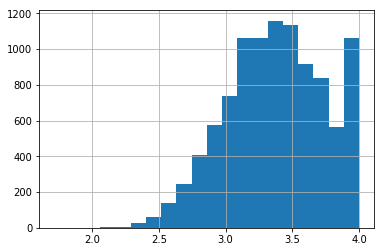

In [75]:
#Look at the distribution of original GPAs
from matplotlib import pyplot as plt
students_df_w_mean_std['gpa'].hist(bins=20)
plt.show()

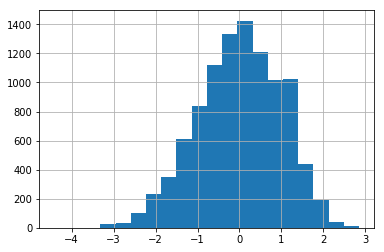

In [76]:
#Look at the distribution of standardized GPAs
students_df_w_mean_std['standardized_gpa'].hist(bins=20)
plt.show()

Let's try looking at disparate data and use it to join the data.

Let's use Pandas to get all of the data from Quiz 2 into the same DataFrame.

In [ ]:
with open('department_enrollment.json', 'r') as f:
    dept_enrollment = json.load(f)

In [ ]:
dept_enrollment.keys()

In [ ]:
#Let's try creating a DataFrame from this dictionary of lists

The creation of DataFrames from dictionaries of lists MUST have lists that are the same length. Since we can't do that with our dictionary here, we're going to have to manually do this.

In [ ]:
#Write a function that makes a single DataFrame for a major

In [ ]:
#Let's create a list of DataFrames and concatenate them together

In [ ]:
#Take a look at the new big DataFrame

In [ ]:
#Let's load the student_gpas.json file

In [ ]:
#Getting the data into a DataFrame isn't easy

In [ ]:
#Load student_directory data

In [186]:
#Now let's combine all of the data together

In [ ]:
#We can convert a dictionary of values into a Pandas Series
#Remember that a DataFrame is equivalent to a dictionary of lists
pd.Series(average_gpas)